In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon, Point
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option("display.precision", 2)
sns.set()
data = pd.read_csv(url)
# Leitura dos dados do IBGE, que é necessário um encode específico para o caso, ainda não sendo perfeito
ibge_sp = pd.read_csv(
    'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv',
    encoding='ISO-8859-1',
    sep=';', thousands='.', decimal=','
)
ibge_sp.dropna(how='all', axis=1, inplace=True)
data_setor_censo = gpd.read_file('35SEE250GC_SIR.shp')

In [66]:
data_pre = data.copy() #uma cópia do arquivo 
data_pre.head(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Achando os bairros onde as ruas não tem nome

In [67]:
is_not = data_pre['Rua']
data_ruas = data_pre[is_not.isnull()]
bairro_sem_rua = data_ruas['Bairro'].unique()
# bairro_sem_rua, onde eu encontro os bairros onde as ruas não tem nome

Retirando do arquivo os dados onde não constam Ruas

In [68]:
data_pre = data_pre[~is_not.isna()]
# data_pre agora sem os dados onde não encontramos os nomes das ruas

In [69]:
data_pre.head(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000


In [70]:
data_pre["Valor"].str.split(expand = True)[2].unique()
# encontramos os casos que a coluna 2 - [0],[1],[2], tem algo preenchido
# no caso sendo ou nulo, ou /mês

array([None, '/Mês'], dtype=object)

In [71]:
data_pre["Valor"].str.split(expand = False)
# lista do split após

0          [R$, 7.000.000]
1          [R$, 3.700.000]
2            [R$, 380.000]
4            [R$, 540.000]
5          [R$, 1.980.000]
               ...        
10003        [R$, 665.000]
10004      [R$, 2.300.000]
10005      [R$, 1.050.000]
10006    [R$, 2.200, /Mês]
10007        [R$, 270.000]
Name: Valor, Length: 6574, dtype: object

In [72]:
len(data_pre["Valor"].str.split(expand = True)[1].unique())
# numero de valores das casas

861

In [73]:
data_pre_split = data_pre[data_pre["Valor"].str.split(expand = True)[2].isna()]
data_pre_split = data_pre_split["Valor"].str.split(expand = True)
data_pre_split.head(3)

,0,1
0,R$,7.000.000
1,R$,3.700.000
2,R$,380.000


In [74]:
#altera o valor da primeira coluna para float
data_pre_split[1] = data_pre_split[1].str.replace(".","").astype(float)

/var/folders/xc/hzpjszwj7sngpdvgtvrfd7nm0000gn/T/ipykernel_10321/4170755202.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_pre_split[1] = data_pre_split[1].str.replace(".","").astype(float)


In [75]:
data_pre[["Moeda", "Valor"]] = data_pre_split
data_pre = data_pre[~data_pre['Valor'].isna()]
data_pre = data_pre[['Rua','Bairro', 'Cidade', 'Metragem','Quartos', 'Banheiros','Vagas','Moeda','Valor']]
data_pre.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,380000.00


In [76]:
#adiciona o valor do metro quadrado aos dados da residência
data_pre["V_m2"] = data_pre["Valor"]/data_pre["Metragem"]
data_pre.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor,V_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,380000.00,3040.00


In [77]:
#média geral da soma dos inteiros e floats
data_pre_bairros = data_pre.groupby("Bairro")
data_pre_mean = data_pre_bairros.mean()
data_pre_mean.reset_index(inplace = True) #reseta o valor do index, colocando a numeração
data_pre_mean.head(3)

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor,V_m2
0,Aclimação,247.62,3.27,3.03,2.88,1766659.75,7627.47
1,Alto da Boa Vista,393.71,4.14,5.14,4.71,2304285.71,5964.93
2,Alto da Lapa,276.75,3.04,3.80,3.36,2044163.64,7957.39


In [78]:
#define o somatorio das partes dadas como inteiros ou floats
data_pre_sum = data_pre.groupby("Bairro").sum()
data_pre_sum.head(3)

,Metragem,Quartos,Banheiros,Vagas,Valor,V_m2
Bairro,,,,,,
Aclimação,19067,252,233,222,136032801.00,587315.17
Alto da Boa Vista,2756,29,36,33,16130000.00,41754.54
Alto da Lapa,15221,167,209,185,112429000.00,437656.69


In [79]:
#defino o valor do metro quadrado por bairro a partir da média das somas
data_pre_sum['V_m2'] = data_pre_sum['Valor']/data_pre_sum['Metragem']
data_pre_sum.reset_index(inplace = True) #reseta o valor do index, colocando a numeração
data_pre_sum['V_m2'].head(3)

0   7134.46
1   5852.69
2   7386.44
Name: V_m2, dtype: float64

In [80]:
#atualizei a tabela para ter os valores do m2 como o resultado da media das somas
data_pre_bairros = data_pre_bairros.mean()
data_pre_bairros.reset_index(inplace = True) #reseta o valor do index, colocando a numeração
data_pre_bairros["V_m2"] = data_pre_sum['V_m2']
data_pre_bairros.head(3)

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor,V_m2
0,Aclimação,247.62,3.27,3.03,2.88,1766659.75,7134.46
1,Alto da Boa Vista,393.71,4.14,5.14,4.71,2304285.71,5852.69
2,Alto da Lapa,276.75,3.04,3.80,3.36,2044163.64,7386.44


In [81]:
#conta a quantidade de vezes que cada bairro aparece e seleciona os 10 mais
data_bairros_more = data_pre["Bairro"].value_counts()
data_bairros_more

Alto de Pinheiros       218
Jardim Guedala          197
Brooklin Paulista       158
Vila Mariana            155
Planalto Paulista       148
                       ... 
Vila Picinin              1
Jardim Maria Augusta      1
Jardim Santa Maria        1
Parque do Castelo         1
Capela do Socorro         1
Name: Bairro, Length: 598, dtype: int64

In [82]:
#agora seleciona os 10 bairros que mais aparecem
data_pre_bairros_more = data_pre["Bairro"].value_counts()[:10].index
data_pre_bairros_more

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Brooklin Paulista',
       'Vila Mariana', 'Planalto Paulista', 'Pacaembu', 'Jardim Paulista',
       'Vila Madalena', 'Campo Belo', 'Jardim Europa'],
      dtype='object')

In [83]:
#transforma o data_pre_bairros_more na database dos top 10 bairros que mais aparecem
data_pre_more = data_pre_bairros.query("Bairro in @data_pre_bairros_more")
data_pre_more_save = data_pre_bairros.query("Bairro in @data_pre_bairros_more & Metragem < 30000")
data_pre_more.head(3)

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor,V_m2
4,Alto de Pinheiros,431.16,3.95,4.68,4.87,4837183.10,11219.10
17,Brooklin Paulista,300.21,3.44,3.61,3.63,2095403.73,6979.82
22,Campo Belo,277.89,3.39,3.61,3.23,1923897.01,6923.29


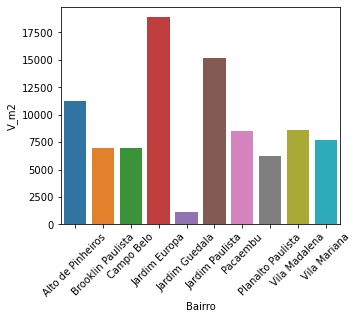

In [84]:
plt.figure(figsize=(5, 4))
ax = sns.barplot(x="Bairro", y="V_m2", data=data_pre_more)
ax.tick_params(axis='x', rotation=45)

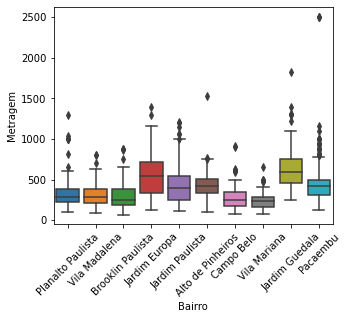

In [85]:
#agora uma analise especificando os pontos fora da curva e com suas devidas margens
plt.figure(figsize=(5, 4))
ax = sns.boxplot(data = data_pre.query("Bairro in @data_pre_bairros_more & Metragem < 30000"), x="Bairro", y="Metragem")
ax.tick_params(axis='x', rotation=45)
plt.show()

Agora comneço a adicionar o espaço amostral dados do IBGE

In [86]:
#transformação dos dados do ibge para o database que trabalharemos
data_ibge = ibge_sp.copy()
data_ibge.head(3)

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74


In [87]:
#importamos os dados das raus onde agora contém um possível caso de ligação entre os dados
# das vendas e do IBGE, sendo assim um provavél intermediário entre as duas databases
data_enderecos = pd.read_csv("enderecos.csv")
data_enderecos.head(3)

/var/folders/xc/hzpjszwj7sngpdvgtvrfd7nm0000gn/T/ipykernel_10321/1366369065.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_enderecos = pd.read_csv("enderecos.csv")


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.00,-30.88,-55.55
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.00,-30.86,-55.56


In [88]:
#agora selecionamos dos dados que temos, os dados específicos da cidade do estudo, que no caso é São Paulo
data_enderecos_sp = data_enderecos.query("sigla_uf == 'SP'")
data_enderecos_sp.head(3)

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35


In [89]:
#aqui reorganizamos os nomes das ruas, unidos os tipo_logr + logr_nome para,
# assim termos o nome da rua, em seguida colocamos toda em caixa baixa os nomes completos
data_enderecos_sp["rua"] = data_enderecos_sp["tipo_logr"] + " " + data_enderecos_sp["logr_nome"]
data_enderecos_sp["rua"] = data_enderecos_sp["rua"].str.lower().str.strip()
data_enderecos_sp = data_enderecos_sp[["rua", "tipo_logr", "logr_nome", "logr_compl", "numero", "bairro","nome_localidade", "sigla_uf","cep","latitude","longitude"]]
data_enderecos_sp.head(3)

/var/folders/xc/hzpjszwj7sngpdvgtvrfd7nm0000gn/T/ipykernel_10321/1381913767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_enderecos_sp["rua"] = data_enderecos_sp["tipo_logr"] + " " + data_enderecos_sp["logr_nome"]
/var/folders/xc/hzpjszwj7sngpdvgtvrfd7nm0000gn/T/ipykernel_10321/1381913767.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_enderecos_sp["rua"] = data_enderecos_sp["rua"].str.lower().str.strip()


,rua,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,rua joão antônio vasconcelos,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
413269,rua a,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34
413270,rua a,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35


In [90]:
#aqui retiramos dos nomes das ruas da nossa data_pre os maiusculos e os minusculos, e os
#numeros que antes estavam presentes agora mantendo apenas os nomes das raus em caixa baixa
data_pre["Rua"] = data_pre["Rua"].str.extract(r'(^[\w ]+)')
data_pre["Rua"] = data_pre["Rua"].str.lower().str.strip()
data_pre.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor,V_m2
0,avenida itacira,Planalto Paulista,São Paulo,1000,4,8,6,R$,7000000.00,7000.00
1,rua aurelia perez alvarez,Jardim dos Estados,São Paulo,496,4,4,4,R$,3700000.00,7459.68
2,rua alba valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,380000.00,3040.00


In [91]:
#aqui juntamos as tabelas que tinhamos os dados intermediarios e os dados a serem estudados, a
#partir dos nomes das ruas que anteriormente deixamos padronizados igualmente
data_merge = pd.merge(left = data_pre, right = data_enderecos_sp[["rua", "cep", "latitude", "longitude"]], how = "left", left_on = "Rua", right_on = "rua").drop_duplicates(subset=data_pre.columns).query("cep > 0")
data_merge = data_merge[['Rua','Bairro', 'Cidade', 'Metragem','Quartos', 'Banheiros','Vagas','Moeda','Valor','V_m2','cep','latitude','longitude']]
data_merge.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor,V_m2,cep,latitude,longitude
0,avenida itacira,Planalto Paulista,São Paulo,1000,4,8,6,R$,7000000.00,7000.00,11443160.00,-23.98,-46.20
5,rua aurelia perez alvarez,Jardim dos Estados,São Paulo,496,4,4,4,R$,3700000.00,7459.68,4642020.00,-23.64,-46.69
6,rua alba valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,380000.00,3040.00,4845200.00,-23.75,-46.70


In [92]:
#definimos o setor censitario apenas para os da cidade de São Paulo que é a cidade em questão
#no estudo
setor_censo = data_setor_censo[data_setor_censo.NM_MUNICIP == "SÃO PAULO"]

In [97]:
#agora é definido para cada ponto de latitude e longitude um setor censitário e o ponto dentro
# do polígono

# vou deixar em comentario para nao executar novamente


#data_merge["Point"] = ""
#for i in data_merge.index:
#    data_merge["Point"][i] = Point(data_merge["longitude"][i], data_merge["latitude"][i])

#data_merge['setor_censo'] = data_merge["Point"].map(
#    lambda x: setor_censo.loc[setor_censo.contains(x), 'CD_GEOCODI'].values
#).str[0]

/var/folders/xc/hzpjszwj7sngpdvgtvrfd7nm0000gn/T/ipykernel_10321/1006122587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merge["Point"][i] = Point(data_merge["longitude"][i], data_merge["latitude"][i])


In [100]:
#exibo a database os 3 primeiros termos

# vou deixar em comentario para nao executar novamente
dados_vendas_censo = pd.merge(left = dados_geo, right = ibge_sp, how = "left", left_on = "setor_censo", right_on = "Cod_setor")
dados_vendas_censo
#data_merge.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor,V_m2,cep,latitude,longitude,Point,setor_censo
0,avenida itacira,Planalto Paulista,São Paulo,1000,4,8,6,R$,7000000.00,7000.00,11443160.00,-23.98,-46.20,POINT (-46.2013172 -23.975993),NaN
5,rua aurelia perez alvarez,Jardim dos Estados,São Paulo,496,4,4,4,R$,3700000.00,7459.68,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023
6,rua alba valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,380000.00,3040.00,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050


In [102]:
#aqui eu exporto a database para agilizar o processamento, sem a necessidade de recalcular
#constantemente

# vou deixar em comentario para nao executar novamente

#compression_opts = dict(method='zip', archive_name='data_merge.csv')  
#data_merge.to_csv('out.zip', index=False, compression=compression_opts)

In [105]:
#agora com o arquivo exportado eu leio o arquivo e transformo na variável
data_merge = pd.read_csv('data_merge.csv')
data_merge.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor,V_m2,cep,latitude,longitude,Point,setor_censo
0,avenida itacira,Planalto Paulista,São Paulo,1000,4,8,6,R$,7000000.00,7000.00,11443160.00,-23.98,-46.20,POINT (-46.2013172 -23.975993),NaN
1,rua aurelia perez alvarez,Jardim dos Estados,São Paulo,496,4,4,4,R$,3700000.00,7459.68,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00
2,rua alba valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,380000.00,3040.00,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00


In [106]:
#merge dos dados das tabelas anteriormente mescladas com os dados do IBGE do censo de 2010
data_merge_ibge = pd.merge(left = data_merge, right = data_ibge, how = "left", left_on = "setor_censo", right_on = "Cod_setor")
data_merge_ibge.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor,V_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,avenida itacira,Planalto Paulista,São Paulo,1000,4,8,6,R$,7000000.00,7000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,rua aurelia perez alvarez,Jardim dos Estados,São Paulo,496,4,4,4,R$,3700000.00,7459.68,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,rua alba valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,380000.00,3040.00,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88


<AxesSubplot:xlabel='V005', ylabel='V_m2'>

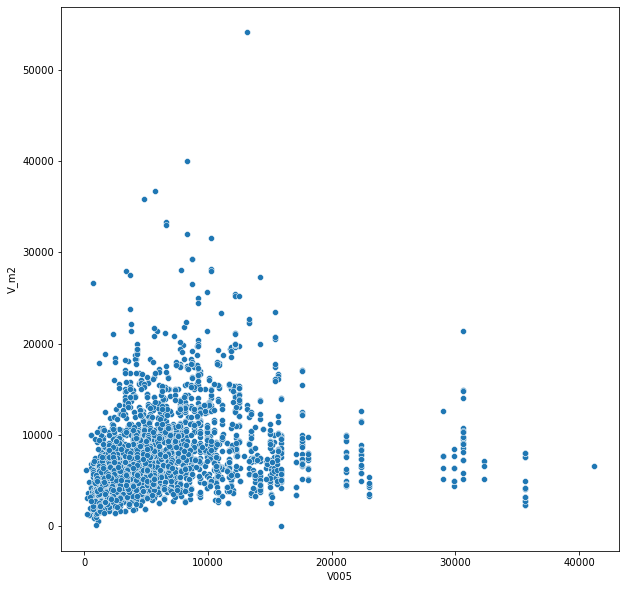

In [110]:
#plot do grafico de pontos na comparacao de valor de renda medio na regiao censitaria e
#valor medio da casa por m2
plt.figure(figsize=(10, 10))
sns.scatterplot(data = data_merge_ibge, x="V005", y="V_m2")

In [116]:
#lendo o arquivo de georeferenciamento
data_sp = gpd.read_file('35SEE250GC_SIR.shp')

In [117]:
# Convertendo a coluna CD_GEOCODD para o tipo float
data_sp['CD_GEOCODD'] = data_sp['CD_GEOCODD'].astype(float)

In [118]:
#limitando o dataset de dados geográficos para a cidade de São Paulo
data_sp = data_sp[data_sp['NM_MUNICIP']=='SÃO PAULO']

In [120]:
#acrescentando no dataset de dados geográficos a coluna V005 que se refere a renda média por
#bairro
data_sp = pd.merge(left = data_sp, right = data_merge_ibge[['Cod_distrito','V005']], how = "left", left_on = "CD_GEOCODD", right_on = "Cod_distrito")

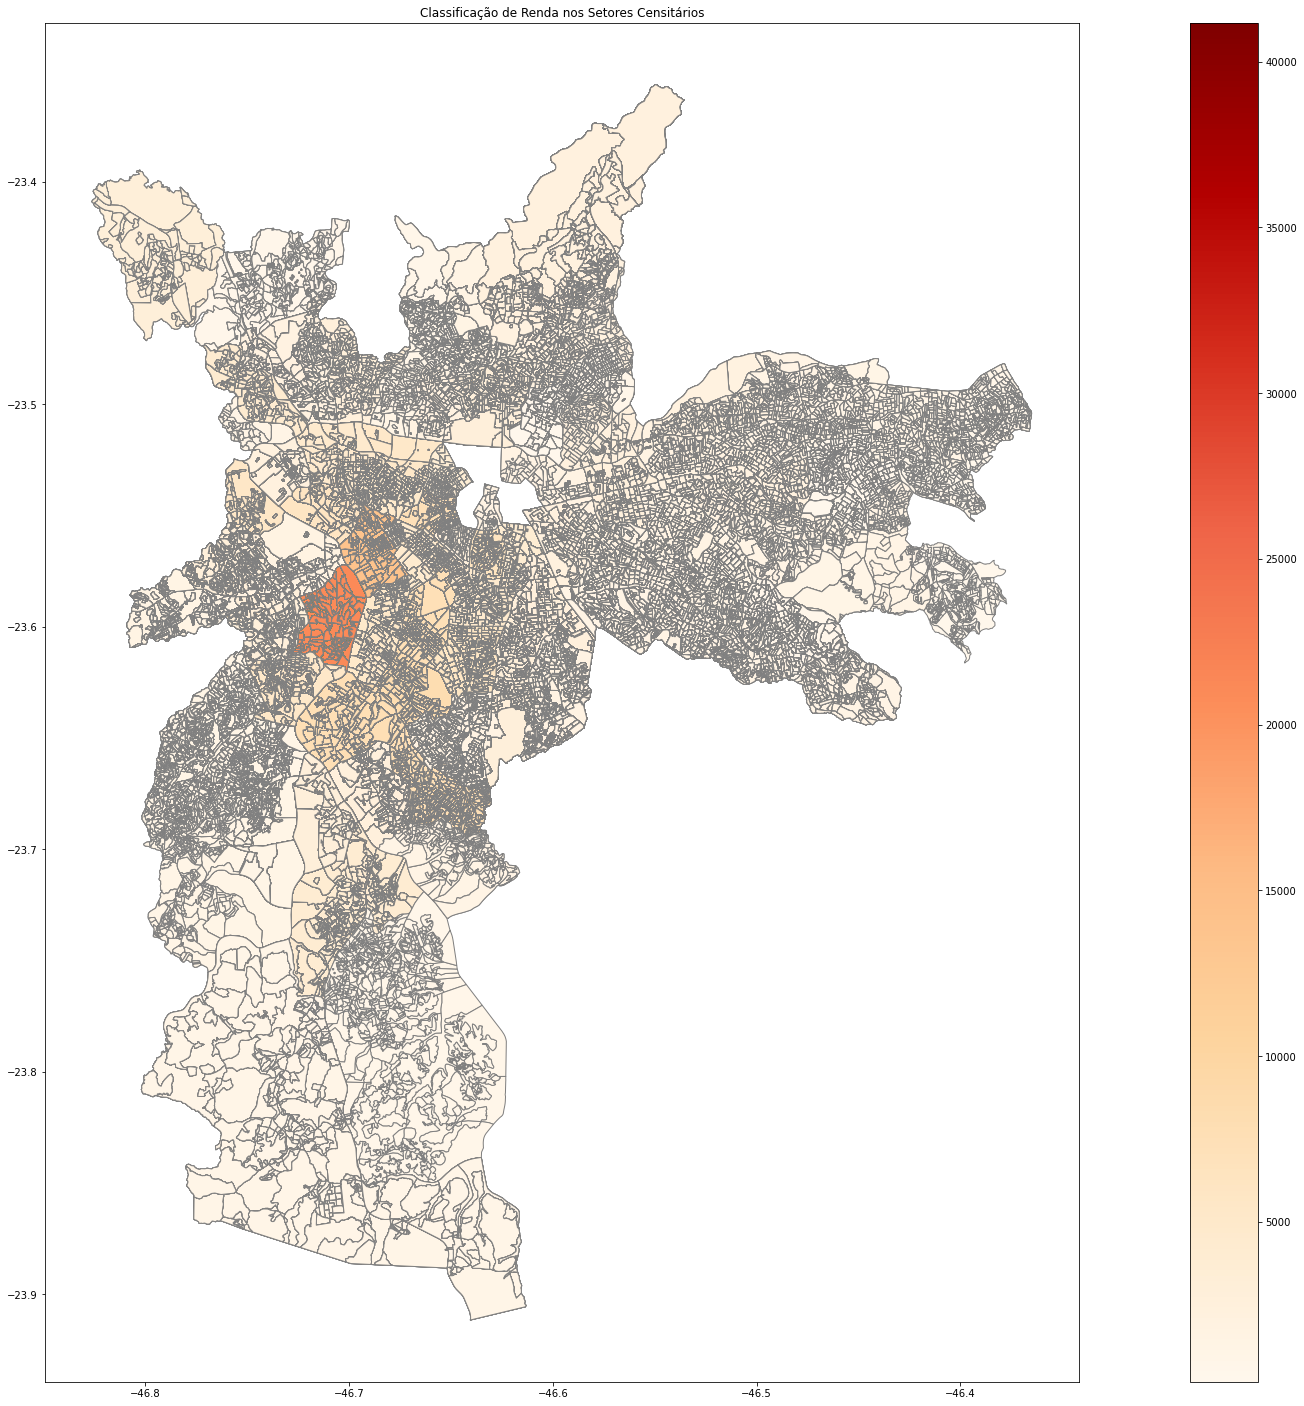

In [122]:
#plot do grafico de renda com base no mapa ofertado e dos dados oferecidos
data_sp_reset = data_sp[data_sp.NM_MUNICIP == 'SÃO PAULO'].reset_index(drop=True)

ax2 = data_sp_reset.plot(figsize=(40,25), column='V005', cmap='OrRd', edgecolor='gray', legend=True)
ax2.set_title('Classificação de Renda nos Setores Censitários');

In [126]:
#agora retiramos os valores que são muito discrepantes da média de valores
data_merge_ibge.drop(data_merge_ibge.query("Valor > 30000000 | Valor < 100000").index, inplace = True)

In [128]:
data_merge_ibge = data_merge_ibge[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor', 'V_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']].dropna()

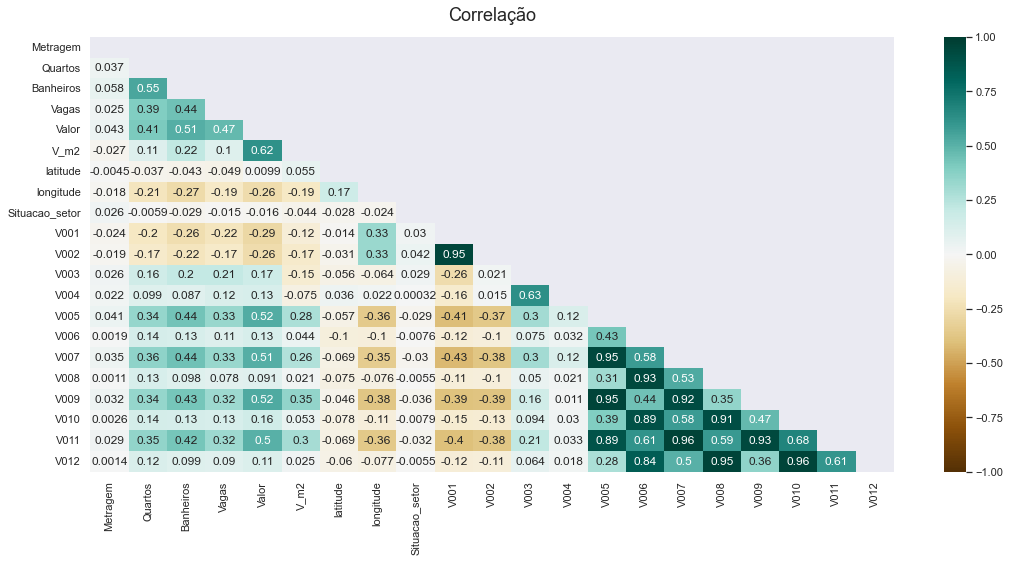

In [132]:
#analise dos fatores relevantes de dados, correlacionando-os
#com a correleção variando entre -1 e 1, sendo asssim relacionando a proporcionalidade sendo
#-1 inversamente, 1 proporcionalmente e 0 não correlacionados

#data_merge_ibge.corr() -  forma de calcular as correlações

plt.figure(figsize=(18, 8))
mask = np.triu(np.ones_like(data_merge_ibge.corr(), dtype=bool))
heatmap = sns.heatmap(data_merge_ibge.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);
#https://www.tylervigen.com/spurious-correlations